In [1]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import time

In [2]:
neighbors_filter = np.ones(shape=(3, 3))
neighbors_filter[1, 1] = 0

In [3]:
def compute_step(grid, 
                 min_death_threshold=2, 
                 max_death_threshold=3, 
                 birth_threshold=3):
    
    neighbors_counter = convolve2d(grid, neighbors_filter, mode='same')
    
    new_grid = grid.copy()
    
    # deaths
    new_grid[neighbors_counter < min_death_threshold] = 0
    new_grid[neighbors_counter > max_death_threshold] = 0
    
    # births
    new_grid[neighbors_counter == birth_threshold] = 1
    
    return new_grid

In [4]:
def compute_episode(initial_grid,
                    steps, 
                    min_death_threshold=2, 
                    max_death_threshold=3, 
                    birth_threshold=3):
    history = []
    grid = initial_grid
    for i in range(steps):
        grid = compute_step(grid=grid,
                            min_death_threshold=min_death_threshold, 
                            max_death_threshold=max_death_threshold, 
                            birth_threshold=birth_threshold
                           )
        history.append(grid)
        
    return history


In [5]:
def display_episode(history, waiting_time=.5):
    for frame in history:
        clear_output()
        plt.matshow(frame, cmap='Greys')
#         plt.axis('off')
        plt.grid(True)
        plt.show()
        time.sleep(waiting_time)
        

## Oscillateur

In [6]:
initial_grid = np.zeros(shape=(5, 5))
initial_grid[2, 1:4] = 1

# plt.matshow(initial_grid)
# plt.show()

In [7]:
history = compute_episode(initial_grid=initial_grid, steps=9)

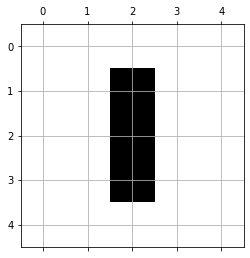

In [8]:
display_episode(history, waiting_time=1)

In [128]:
# from bokeh.plotting import Figure, output_notebook, show
# from bokeh.models import TapTool, Tap
# output_notebook()

In [129]:
# grid_size = 5

# p = Figure(x_range=[-1, grid_size], y_range=[-1, grid_size], toolbar_location=None, tools='tap')
# p.xaxis.visible = False
# p.xgrid.visible = False
# p.yaxis.visible = False
# p.ygrid.visible = False
# # p.toolbar.location=None

# selected = []

# grid = np.array(
#     [
#         [i, j] for i in range(grid_size) for j in range(grid_size)
#     ]
# )

# # taptool = p.select(type=TapTool)

# def callback(event):
#     selected = source.selected.indices
#     print(selected)

# p.on_event('tap', callback)

# p.scatter(grid[:, 0], grid[:, 1], marker='square', size=80, color='#e5d7d7')

# show(p)

In [10]:
from skvideo.io import vwrite

In [11]:
vwrite('oscillator.mp4', history, outputdict={
        '-vcodec': 'libx264',
        '-pix_fmt': 'yuv420p'
        })

In [12]:
from IPython.display import Video
Video('oscillator.mp4')

In [140]:
history

[array([[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]